## Objective

The dataset is a collection of morphological measurements of several Iris flowers. These measurements will enable us to distinguish multiple species of the flowers. Today, species are identified by their DNA fingerprints, but in the 1930s, DNA's role in genetics had not yet been discovered.

The problem we want to solve is, **"Given these examples, if we see a new flower out in the field, could we make a good prediction about its species from its measurements?"**

In [1]:
# Importing matplotlib and numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Load the Iris data from sklearn
from sklearn.datasets import load_iris
data = load_iris()

## Description of Iris Data


In [3]:
description = data['DESCR']
description.replace('\\n', '\n')
print(description)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
feature_matrix = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names 
print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Packaging data with Pandas

In [5]:
iris_data = pd.DataFrame({
    'sepal_length': feature_matrix[:,0],
    'sepal_width': feature_matrix[:,1],
    'petal_length': feature_matrix[:,2],
    'petal_width': feature_matrix[:,3],
    'target': target
})

In [6]:
# Let's change the representation of the target column from numericals to names of the classes
iris_data['target'] = iris_data.target.apply(lambda t: target_names[t])

In [20]:
iris_data

,petal_length,petal_width,sepal_length,sepal_width,target
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
5,1.7,0.4,5.4,3.9,setosa
6,1.4,0.3,4.6,3.4,setosa
7,1.5,0.2,5.0,3.4,setosa
8,1.4,0.2,4.4,2.9,setosa
9,1.5,0.1,4.9,3.1,setosa


In [8]:
marker_map = {"setosa": ">", "versicolor": "o", "virginica": "x"}
color_map = {"setosa": "red", "versicolor": "green", "virginica": "blue"}

## Plotting Sepal Length vs Sepal Width

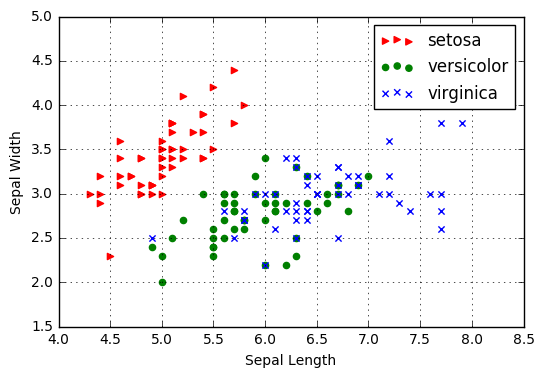

In [9]:
iris_grouped_data = iris_data.groupby(by='target')
for key, group in iris_grouped_data:
    plt.scatter(group['sepal_length'], group['sepal_width'], color=color_map[key], marker=marker_map[key])
    plt.grid(True)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

## Plotting Sepal Length vs Petal Length

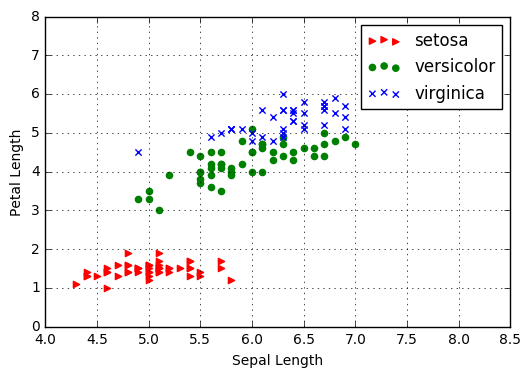

In [10]:
iris_grouped_data = iris_data.groupby(by='target')
for key, group in iris_grouped_data:
    plt.scatter(group['sepal_length'], group['petal_length'], color=color_map[key], marker=marker_map[key])
    plt.grid(True)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

## Plotting Sepal Length vs Petal Width

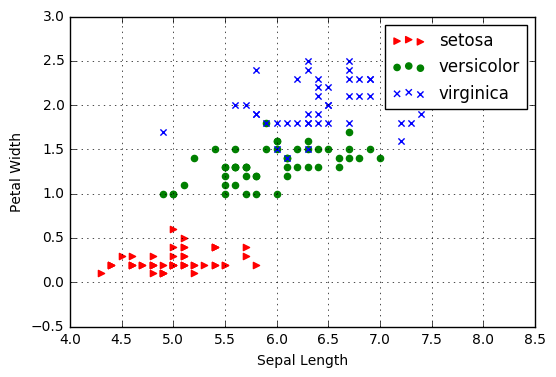

In [11]:
iris_grouped_data = iris_data.groupby(by='target')
for key, group in iris_grouped_data:
    plt.scatter(group['sepal_length'], group['petal_width'], color=color_map[key], marker=marker_map[key])
    plt.grid(True)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")

## Plotting Petal Length vs Sepal Width

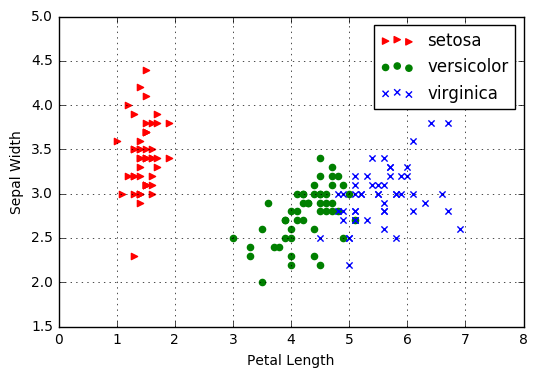

In [12]:
iris_grouped_data = iris_data.groupby(by='target')
for key, group in iris_grouped_data:
    plt.scatter(group['petal_length'], group['sepal_width'], color=color_map[key], marker=marker_map[key])
    plt.grid(True)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")

## Plotting Petal Length vs Petal Width

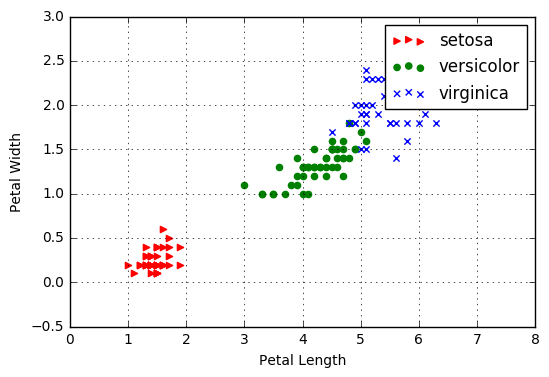

In [13]:
iris_grouped_data = iris_data.groupby(by='target')
for key, group in iris_grouped_data:
    plt.scatter(group['petal_length'], group['petal_width'], color=color_map[key], marker=marker_map[key])
    plt.grid(True)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

## Inference:

When we plotted Petal Length vs Petal Width, it be inferred any flower which has a Petal Length lesser than 2 is a Setosa. 

## Predict Probability of a flower being Setosa, Versicolor or Virginica

In [14]:
def predict_probability(feature_matrix, coeffecients):
    """
    Predicts the probability of a a flower being Setosa, Versicolor or Virginica

    Returns: a vector of predicted probability
    """    
    scores = np.dot(feature_matrix, coeffecients)
    predictions = [1. / (1. + np.exp(-score)) for score in scores]
    return predictions

## Find the feature Feature Derivative of the of the Log Likelihood

In [15]:
def feature_derivative(error, features):
    """
    Calculates the derivative of log likelihood
    
    Returns - a scalar of derivative
    """
    derivative = np.dot(error, features)
    return derivative

## Find the Coeffecients using Logistic Regression

In [16]:
from math import sqrt

def logistic_regression(feature_matrix, family, initial_coeffecients, step_size, max_iter, target):
    """
    Logistic Regression predicts the coefficents which maximizes the accuracy of the model.
    
    Arguments:
    feature_matrix - Refers to the feature matrix
    family - Refers to the class of flower already determined
    initial_coefficients - Refers to the initial set of coefficients used by regression
    step_size - Refers to the learning rate of the model, determines how fast a model learns
    max_iter - Refers to the maximum number of iterations for which a model should iterate
    target - Refers to the class of flower to be predicted
    
    Returns: a vector of coeff
    """
    coeffecients = np.array(initial_coeffecients)
    for itr in range(max_iter):
        predictions = predict_probability(feature_matrix, coeffecients)
        indicator = (family==target)
        error = indicator - predictions
        for j in range(len(coeffecients)):
            derivative = feature_derivative(error, feature_matrix[:,j])
            # Adding up the gradient              
            coeffecients[j] += step_size * derivative
    return coeffecients

## Determine the coefficients for a model classifying a flower as Setosa 

In [31]:
coefficients = logistic_regression(feature_matrix, target, initial_coeffecients=np.zeros(4), step_size=10e-4, max_iter=1000, target=0)

# Calculates the score using the dotproduct of the feature_matrix and coefficients
scores = np.dot(feature_matrix, coefficients)
# Predict the class of the flower to be 0 (as 0 represents Setosa) and -1 if the class is not setosa 
prediction = [0 if score > 0 else -1 for score in scores]
# Calculates the number of correctly classified examples
num_of_correctly_classified_examples = len(target[np.array(prediction) == np.array(target)])
# Assigns the total number of Setosa present in the model
num_of_flower_classified_as_setosa = 50
# Calculates the accuracy of the model
accuracy = num_of_correctly_classified_examples / num_of_flower_classified_as_setosa

print("The accuracy of the model classifying a flower as Setosa is",accuracy*100, '%')

The accuracy of the model classifying a flower as Setosa is 100.0 %
